<a href="https://colab.research.google.com/github/Juhi-Purswani/Tensorflow_Multiclass_Image_Classification/blob/master/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive') 


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

drive  sample_data


In [0]:
import os
os.chdir("./drive/My Drive/Plant_Seedlings")

In [0]:
import cv2
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
IMG_SIZE = 224
CHANNELS = 3
TRAIN_DIR = 'plant_seedlings'
#TEST_DIR = ''
batch_size = 128
learning_rate = 0.001
training_iters = 20
n_classes = 12

In [0]:
def create_features_labels(DIR):
  features = []
  labels = []
  dir_number = 0
  car_names = os.listdir(DIR)
  for name in car_names:
    path = DIR + '/' + name
    print("dir name and number" , path , 'and',dir_number)
    print(path)
    image_names = os.listdir(path)
    i=0
    for image_name in image_names:
      i=i+1
      if(i>120):
        continue
      image_path = path + '/' + image_name
      img = cv2.imread(image_path,cv2.IMREAD_COLOR)
      img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
      features.append(img)
      labels.append(np.array(dir_number))
    dir_number = dir_number + 1
  return(features , labels)

In [0]:
train_features,train_labels = create_features_labels(TRAIN_DIR)
#test_features,test_labels = create_features_labels(TEST_DIR)
train_features = np.asarray(train_features).reshape(-1,IMG_SIZE,IMG_SIZE,CHANNELS)
#test_features = np.asarray(test_features).reshape(-1,IMG_SIZE,IMG_SIZE,CHANNELS)

dir name and number plant_seedlings/Scentless Mayweed and 0
plant_seedlings/Scentless Mayweed
dir name and number plant_seedlings/Loose Silky-bent and 1
plant_seedlings/Loose Silky-bent
dir name and number plant_seedlings/Common wheat and 2
plant_seedlings/Common wheat
dir name and number plant_seedlings/Charlock and 3
plant_seedlings/Charlock
dir name and number plant_seedlings/Sugar beet and 4
plant_seedlings/Sugar beet
dir name and number plant_seedlings/Cleavers and 6
plant_seedlings/Cleavers
dir name and number plant_seedlings/Fat Hen and 7
plant_seedlings/Fat Hen
dir name and number plant_seedlings/Common Chickweed and 8
plant_seedlings/Common Chickweed
dir name and number plant_seedlings/Shepherd’s Purse and 9
plant_seedlings/Shepherd’s Purse
dir name and number plant_seedlings/Maize and 10
plant_seedlings/Maize
dir name and number plant_seedlings/Black-grass and 11
plant_seedlings/Black-grass


In [0]:
features, labels = shuffle(train_features,train_labels)

In [0]:
labels = np.asarray(labels)
#test_labels = np.asarray(test_labels)
labels = to_categorical(labels)
#test_labels = to_categorical(test_labels)

In [0]:
print(features.shape,labels.shape)
#print(test_features.shape,test_labels.shape)

(1440, 224, 224, 3) (1440, 12)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [0]:
X_train = (X_train/np.float32(255))
X_test = X_test/np.float32(255)

In [0]:
X_train.shape

(1152, 224, 224, 3)

In [0]:
x = tf.placeholder("float",[None,IMG_SIZE,IMG_SIZE,CHANNELS])
y = tf.placeholder("float",[None,n_classes])

conv1 = tf.layers.conv2d(inputs=x,filters=64,kernel_size=[3,3],padding="same",activation =tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=[2,2],strides=2)
conv2 = tf.layers.conv2d(inputs=pool1,filters=32,kernel_size=[3,3],padding="same",activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=[2,2],strides=2)
conv3 = tf.layers.conv2d(inputs=pool2,filters=16,kernel_size=[3,3],padding="same",activation=tf.nn.relu)
pool3 = tf.layers.max_pooling2d(inputs=conv3,pool_size=[2,2],strides=2)
pool3_flat = tf.reshape(pool3,[-1,28*28*16])
dense1 = tf.layers.dense(inputs=pool3_flat,units=1000,activation=tf.nn.relu)
dense2 = tf.layers.dense(inputs=dense1,units=100,activation=tf.nn.relu)
out = tf.layers.dense(inputs=dense2,units=12,activation=tf.nn.relu)

W0707 10:34:20.679914 139925191346048 deprecation.py:323] From <ipython-input-16-76e6c3cf98c3>:4: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0707 10:34:20.687525 139925191346048 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0707 10:34:20.973894 139925191346048 deprecation.py:323] From <ipython-input-16-76e6c3cf98c3>:5: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
W0707 10:34:21.158632 139925191346048 deprecation.py:323] F

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = out,labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
#Two more nodes for accuray evaluation
correct_prediction = tf.equal(tf.argmax(out,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
init = tf.global_variables_initializer()

W0707 10:34:23.325461 139925191346048 deprecation.py:323] From <ipython-input-17-827d028d1050>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
with tf.Session() as sess:
    sess.run(init)
    train_loss = []
    train_accuracy = []
    val_loss = []
    val_accuracy = []
    #summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(X_train)//batch_size):
            batch_x = X_train[batch*batch_size:min((batch+1)*batch_size,len(X_train))]
            batch_y = y_train[batch*batch_size:min((batch+1)*batch_size,len(y_train))]
            #print("A")
            #print(batch_x.shape,batch_y.shape)
            a,b,c,d = batch_x.shape
            if(a==0):
              break
            opt = sess.run(optimizer, feed_dict={x: batch_x,y: batch_y})
            #print("B")
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y})
            #print("C")
        #print("D")
        loss2, val_acc = sess.run([cost, accuracy], feed_dict={x: X_test, y: y_test})
        #print("E")
        print("Epoch", i+1 , ": training loss:" , loss, " , training accuracy:", acc,", validation loss:",loss2,", validation accuracy:",val_acc)
        
        #print("_____________________________________________________________")
        #print(loss)
        #print("_____________________________________________________________")
        train_loss.append(loss)
        train_accuracy.append(acc)
        val_loss.append(loss2)
        val_accuracy.append(val_acc)
    #summary_writer.close()

Epoch 1 : training loss: 2.4743454  , training accuracy: 0.109375 , validation loss: 2.4786994 , validation accuracy: 0.125
Epoch 2 : training loss: 2.452756  , training accuracy: 0.15625 , validation loss: 2.4649377 , validation accuracy: 0.13541667
Epoch 3 : training loss: 2.2987509  , training accuracy: 0.25 , validation loss: 2.3578427 , validation accuracy: 0.1875
Epoch 4 : training loss: 2.0918872  , training accuracy: 0.3515625 , validation loss: 2.2281942 , validation accuracy: 0.21875
Epoch 5 : training loss: 1.9713213  , training accuracy: 0.375 , validation loss: 2.1259859 , validation accuracy: 0.2847222
Epoch 6 : training loss: 1.716682  , training accuracy: 0.4765625 , validation loss: 2.0055492 , validation accuracy: 0.3159722
Epoch 7 : training loss: 1.3872854  , training accuracy: 0.5625 , validation loss: 1.8351977 , validation accuracy: 0.34375
Epoch 8 : training loss: 1.2635484  , training accuracy: 0.5625 , validation loss: 1.837955 , validation accuracy: 0.3680555

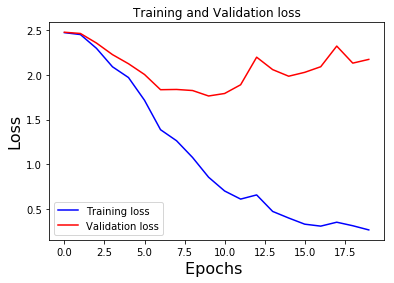

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(val_loss)), val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

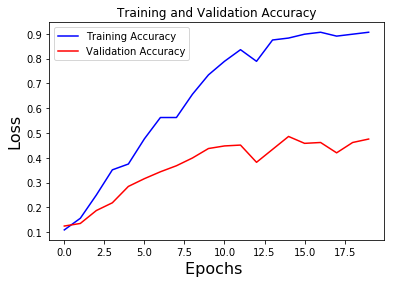

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(val_loss)), val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()